<a href="https://colab.research.google.com/github/hellocybernetics/TensorFlow_Eager_Execution_Tutorials/blob/master/tutorials/01_basics/polynomial_fit_scalar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tf-nightly-2.0-preview

    100% |████████████████████████████████| 74.3MB 424kB/s 
    100% |████████████████████████████████| 245kB 20.0MB/s 
    100% |████████████████████████████████| 3.2MB 7.2MB/s 
    100% |████████████████████████████████| 61kB 25.2MB/s 
    100% |████████████████████████████████| 61kB 25.0MB/s 
    100% |████████████████████████████████| 112kB 34.3MB/s 


In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
def toy_sin_data():
    x = np.linspace(-3, 3, 50)
    y = 5*np.sin(x) + x + np.random.randn(50) - 1
    return x, y

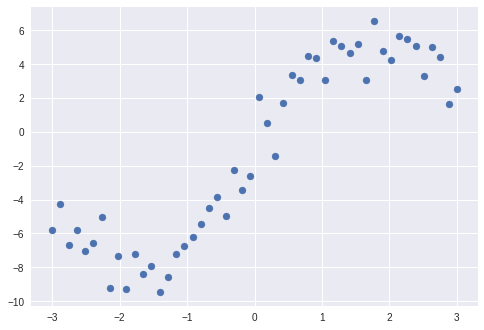

In [13]:
x, y = toy_sin_data()
plt.scatter(x, y)
plt.show()

In [0]:
class Model(tf.keras.Model):
    def __init__(self):
        super(Model, self).__init__()
        self.a1 = tf.Variable(dtype=tf.float32,
                              initial_value=1)
        self.a2 = tf.Variable(dtype=tf.float32,
                              initial_value=-1)
        self.a3 = tf.Variable(dtype=tf.float32,
                              initial_value=1)
        self.b = tf.Variable(dtype=tf.float32,
                             initial_value=2)
  
    def call(self, x):
        return self.b + self.a1*x + self.a2*x**2 + self.a3*x**3      

In [0]:
model = Model()

In [0]:
x = tf.convert_to_tensor(x, dtype=tf.float32)
y = tf.convert_to_tensor(y, dtype=tf.float32)

y_init = model(x)

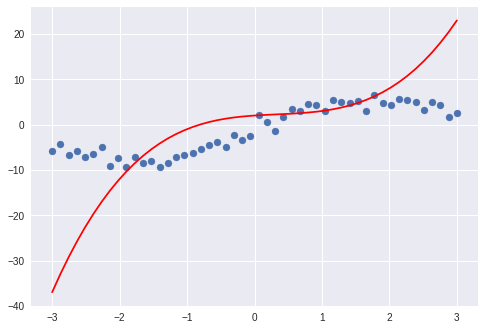

In [27]:
plt.scatter(x, y)
plt.plot(x, y_init, c='r')
plt.show()

In [0]:
def loss_fn(y, y_pre):
    mse = 0.5 * (y - y_pre) ** 2 
    return tf.reduce_sum(mse)

optimizer = tf.keras.optimizers.SGD(1e-4)

In [0]:
reg = []
loss = []
for _ in range(1000):
    
    with tf.GradientTape() as tape:
        y_pre = model(x)
        loss_value = loss_fn(y, y_pre)
    grads = tape.gradient(loss_value, model.variables)

    optimizer.apply_gradients(
        zip(grads, model.variables))

    reg.append((x, y_pre))
    loss.append(loss_value.numpy())

In [30]:
print(model.a1.numpy())
print(model.a2.numpy())
print(model.a3.numpy())
print(model.b.numpy())

5.1125417
-0.07657218
-0.44544858
-0.84460825


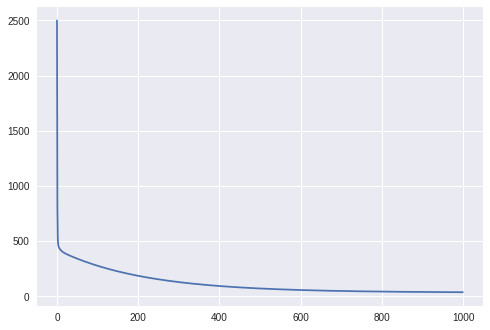

In [31]:
plt.plot(range(1000), loss)
plt.show()

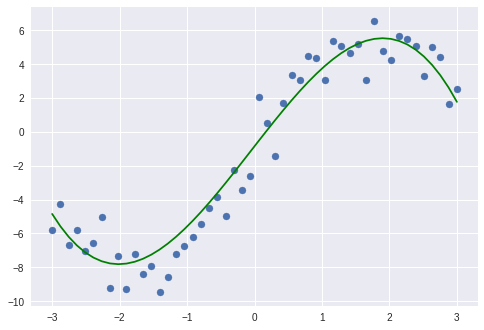

In [32]:
y_predict = model(x)
plt.scatter(x, y)
plt.plot(x, y_predict.numpy(), c="g")

In [0]:
# from matplotlib import animation, rc
# from IPython.display import HTML

# # First set up the figure, the axes, and the plot element
# fig, ax = plt.subplots()
# plt.close()
# ax.set_xlim((-4, 4))
# ax.set_ylim((-15, 15))
# ax.scatter(x, y)
# line1, = ax.plot([], [], lw=2, c='r', linestyle="dashed")
# line2, = ax.plot([], [], lw=2, c='g')
# # initialization function: plot the background of each frame
# def init():
#     line1.set_data(x, y_init)      
#     return (line1,)
# # animation function: this is called sequentially
# def animate(i):
#     (x_reg, y_reg) = reg[i]  
#     line2.set_data(x_reg, y_reg)
#     return (line2,)
# anim = animation.FuncAnimation(fig, animate, init_func=init,
#                                frames=1000, interval=10, blit=True)
# rc('animation', html='jshtml')
# anim